In [11]:
import pandas as pd
import numpy as np
import seaborn as sns 
from tensorflow import keras

In [9]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 3.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.4/671.4 kB 6.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.2/338.2 kB 6.4 MB/

In [13]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [29]:
x= df.drop(columns=['species'])
y= df['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=True , random_state=69)

In [37]:
x_train.shape

(105, 4)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    sepal_length  sepal_width  petal_length  petal_width
57           4.9          2.4           3.3          1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [41]:
y_train = keras.utils.to_categorical(y_train, num_classes = 3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [55]:
model = Sequential()
model.add(Dense(units=32, activation='relu',input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.fit(x_train,y_train,epochs=100,verbose=2)

Epoch 1/100
4/4 - 0s - 102ms/step - accuracy: 0.4095 - loss: 1.0404
Epoch 2/100
4/4 - 0s - 4ms/step - accuracy: 0.4476 - loss: 0.9509
Epoch 3/100
4/4 - 0s - 4ms/step - accuracy: 0.5619 - loss: 0.8690
Epoch 4/100
4/4 - 0s - 4ms/step - accuracy: 0.5429 - loss: 0.8563
Epoch 5/100
4/4 - 0s - 4ms/step - accuracy: 0.5810 - loss: 0.7819
Epoch 6/100
4/4 - 0s - 4ms/step - accuracy: 0.5810 - loss: 0.7782
Epoch 7/100
4/4 - 0s - 4ms/step - accuracy: 0.6571 - loss: 0.7238
Epoch 8/100
4/4 - 0s - 4ms/step - accuracy: 0.6190 - loss: 0.7558
Epoch 9/100
4/4 - 0s - 4ms/step - accuracy: 0.6190 - loss: 0.7387
Epoch 10/100
4/4 - 0s - 4ms/step - accuracy: 0.6571 - loss: 0.6989
Epoch 11/100
4/4 - 0s - 4ms/step - accuracy: 0.6667 - loss: 0.6621
Epoch 12/100
4/4 - 0s - 4ms/step - accuracy: 0.7048 - loss: 0.6482
Epoch 13/100
4/4 - 0s - 4ms/step - accuracy: 0.6667 - loss: 0.6568
Epoch 14/100
4/4 - 0s - 4ms/step - accuracy: 0.7238 - loss: 0.6334
Epoch 15/100
4/4 - 0s - 4ms/step - accuracy: 0.7238 - loss: 0.5905
Ep

In [61]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.99941230e-01 5.72734134e-05 1.51056452e-06]
 [5.18018566e-03 9.66477811e-01 2.83419657e-02]
 [9.99582767e-01 4.04333259e-04 1.28606935e-05]
 [2.83540081e-04 1.93877369e-02 9.80328679e-01]
 [9.99401093e-01 5.76882972e-04 2.20152306e-05]]


In [63]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [65]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int64


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [76]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

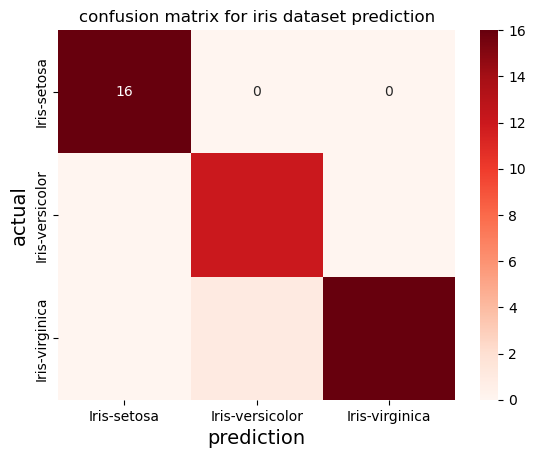

In [82]:
ax = sns.heatmap(cm, annot=True, fmt='d',cmap='Reds',xticklabels=species_name,yticklabels=species_name)
ax.set_title('confusion matrix for iris dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual',fontsize=14)